# MNIST Data Analysis and Classification

### Columns
- **Response - Labels**: The digit represented by the image (0-9).
- **Feature I - Intensity**: The pixel intensity.
- **Feature II - Symmetry**: The pixel symmetry.

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import linear_models

In [72]:
# info = pd.read_csv('data/MNIST_info.txt')
train_data = np.loadtxt('data/MNIST_train.txt')
test_data = np.loadtxt('data/MNIST_test.txt')

# Label extraction
train_labels = train_data[:, 0].astype(int)
test_labels = test_data[:, 0].astype(int)

In [73]:
train_data

array([[ 6.   , -1.   , -1.   , ..., -1.   , -1.   , -1.   ],
       [ 5.   , -1.   , -1.   , ..., -0.671, -0.828, -1.   ],
       [ 4.   , -1.   , -1.   , ..., -1.   , -1.   , -1.   ],
       ...,
       [ 3.   , -1.   , -1.   , ..., -1.   , -1.   , -1.   ],
       [ 0.   , -1.   , -1.   , ..., -1.   , -1.   , -1.   ],
       [ 1.   , -1.   , -1.   , ..., -1.   , -1.   , -1.   ]])

In [74]:
print(f'Training data labels: {train_labels}\nTesting data labels: {test_labels}')

Training data labels: [6 5 4 ... 3 0 1]
Testing data labels: [9 6 3 ... 4 0 1]


In [75]:
train_pixels = train_data[:, 1:]
test_pixels = test_data[:, 1:]

In [76]:
print(f'Training pixels: {train_pixels}\nTesting pixels: {test_pixels}')

Training pixels: [[-1.    -1.    -1.    ... -1.    -1.    -1.   ]
 [-1.    -1.    -1.    ... -0.671 -0.828 -1.   ]
 [-1.    -1.    -1.    ... -1.    -1.    -1.   ]
 ...
 [-1.    -1.    -1.    ... -1.    -1.    -1.   ]
 [-1.    -1.    -1.    ... -1.    -1.    -1.   ]
 [-1.    -1.    -1.    ... -1.    -1.    -1.   ]]
Testing pixels: [[-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 ...
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]]


In [77]:
train_intensities = np.mean(train_pixels, axis=1)
test_intensities = np.mean(test_pixels, axis=1)

In [78]:
print(f'Pixel data intensities: {train_intensities}\n\nPixel Testing data intensities: {test_intensities}')

Pixel data intensities: [-0.31781641 -0.11173828 -0.53799609 ... -0.21258984  0.19517969
 -0.44755859]

Pixel Testing data intensities: [-0.45564453 -0.46973437 -0.32814844 ... -0.38228516  0.01994141
 -0.62204687]


In [79]:
def calculate_symmetry(pixels):
    """
    Calculate the symmetry of the pixel data.
    """
    # Reshape the pixel data to 16x16
    pixels = pixels.reshape(-1, 16, 16)

    # Calculate absolute difference between left and right halves (flipped)
    left_half = pixels[:, :, :8]
    right_half = pixels[:, :, 8:16]
    right_half_flipped = np.flip(right_half, axis=2)

    # Symmetry calculation with mean absolute error
    symmetry = 1 - np.mean(np.abs(left_half - right_half_flipped), axis=(1, 2))
    
    return symmetry

In [80]:
train_symmetry = calculate_symmetry(train_pixels)
test_symmetry = calculate_symmetry(test_pixels)

In [81]:
train_df = pd.DataFrame({
    'Label': train_labels,
    'Intensity': train_intensities,
    'Symmetry': train_symmetry
})

test_df = pd.DataFrame({
    'Label': test_labels,
    'Intensity': test_intensities,
    'Symmetry': test_symmetry
})

In [82]:
train_df.head(10)

,Label,Intensity,Symmetry
0,6,-0.317816,0.620789
1,5,-0.111738,0.466273
2,4,-0.537996,0.556992
3,7,-0.599449,0.702945
4,3,-0.416129,0.651055
5,6,-0.574430,0.493344
6,3,-0.593242,0.508094
7,1,-0.753914,0.882563
8,0,-0.420918,0.562133
9,1,-0.772281,0.837703


In [83]:
test_df.head(10)

,Label,Intensity,Symmetry
0,9,-0.455645,0.480117
1,6,-0.469734,0.452781
2,3,-0.328148,0.493016
3,6,-0.470301,0.522570
4,6,-0.309324,0.309367
5,0,-0.295230,0.668836
6,0,-0.344187,0.708172
7,0,-0.299211,0.811203
8,6,-0.354484,0.467203
9,9,-0.621277,0.721664


In [84]:
train_counts = train_df['Label'].value_counts()
test_counts = test_df['Label'].value_counts()

print(f'Training data counts: {train_counts}\nTesting data counts: {test_counts}')

Training data counts: Label
0    1194
1    1005
2     731
6     664
3     658
4     652
7     645
9     644
5     556
8     542
Name: count, dtype: int64
Testing data counts: Label
0    359
1    264
4    200
2    198
9    177
6    170
3    166
8    166
5    160
7    147
Name: count, dtype: int64


In [85]:
# For checking the distribution of labels in the training and testing data
# This was more of a sanity check to ensure the data was loaded correctly
# And also because the series was not in order

train_counts = np.bincount(train_labels)
test_counts = np.bincount(test_labels)

# print(f'Training data counts: {train_counts}\nTesting data counts: {test_counts}')

# Problem 1

## (A) Plotting for the distribution of labels in the training and testing data

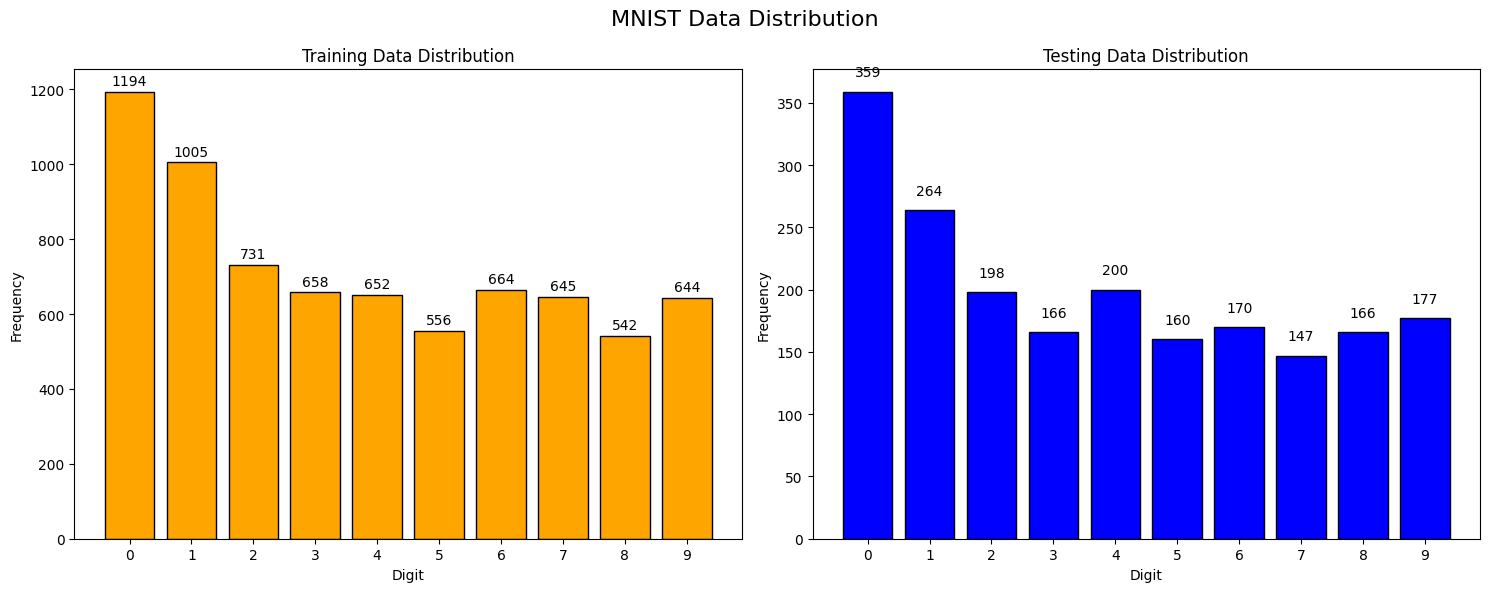

In [86]:
# Plotting for the distribution of labels in the training and testing data
fig, (axis_1, axis_2) = plt.subplots(1, 2, figsize=(15, 6))

digits = np.arange(10)
axis_1.bar(digits, train_counts, color='orange', edgecolor='black')
axis_1.set_xticks(digits)
axis_1.set_xlabel('Digit')
axis_1.set_ylabel('Frequency')
axis_1.set_title('Training Data Distribution')

for i, count in enumerate(train_counts):
    axis_1.text(i, count + 10, str(count), ha='center', va='bottom')
    
axis_2.bar(digits, test_counts, color='blue', edgecolor='black')
axis_2.set_xticks(digits)
axis_2.set_xlabel('Digit')
axis_2.set_ylabel('Frequency')
axis_2.set_title('Testing Data Distribution')

for i, count in enumerate(test_counts):
    axis_2.text(i, count + 10, str(count), ha='center', va='bottom')
    
plt.suptitle('MNIST Data Distribution', fontsize=16)
    
plt.tight_layout()
plt.show()

## (B) Plotting the pixel intensity and symmetry for each digit

Text(0, 0.5, 'Frequency')

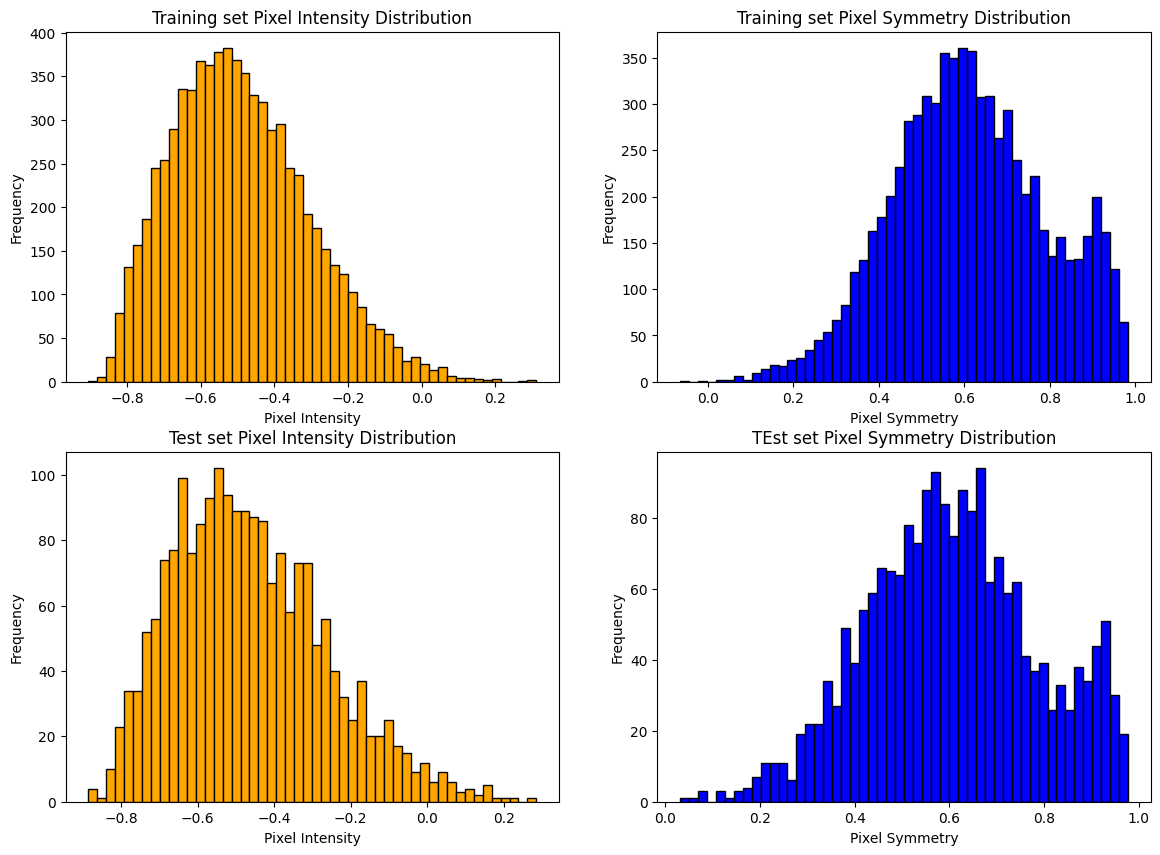

In [87]:
# Train (Symmetry & Intensity) Plots

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].hist(train_intensities, bins=50, color='orange', edgecolor='black')
axes[0, 0].set_title('Training set Pixel Intensity Distribution')
axes[0, 0].set_xlabel('Pixel Intensity')
axes[0, 0].set_ylabel('Frequency')

axes[0, 1].hist(train_symmetry, bins=50, color='blue', edgecolor='black')
axes[0, 1].set_title('Training set Pixel Symmetry Distribution')
axes[0, 1].set_xlabel('Pixel Symmetry')
axes[0, 1].set_ylabel('Frequency')

# Test (Symmetry & Intensity) Plots

axes[1, 0].hist(test_intensities, bins=50, color='orange', edgecolor='black')
axes[1, 0].set_title('Test set Pixel Intensity Distribution')
axes[1, 0].set_xlabel('Pixel Intensity')
axes[1, 0].set_ylabel('Frequency')

axes[1, 1].hist(test_symmetry, bins=50, color='blue', edgecolor='black')
axes[1, 1].set_title('TEst set Pixel Symmetry Distribution')
axes[1, 1].set_xlabel('Pixel Symmetry')
axes[1, 1].set_ylabel('Frequency')

In [88]:
# Print summary statistics
print("===== * Summary Statistics * =====")
print("\nTraining Set:")
print(f"Intensity - Mean: {np.mean(train_intensities):.4f}, Median: {np.median(train_intensities):.4f}, Std: {np.std(train_intensities):.4f}")
print(f"Symmetry - Mean: {np.mean(train_symmetry):.4f}, Median: {np.median(train_symmetry):.4f}, Std: {np.std(train_symmetry):.4f}")

print("\nTest Set:")
print(f"Intensity - Mean: {np.mean(test_intensities):.4f}, Median: {np.median(test_intensities):.4f}, Std: {np.std(test_intensities):.4f}")
print(f"Symmetry - Mean: {np.mean(test_symmetry):.4f}, Median: {np.median(test_symmetry):.4f}, Std: {np.std(test_symmetry):.4f}")


===== * Summary Statistics * =====

Training Set:
Intensity - Mean: -0.4910, Median: -0.5094, Std: 0.1859
Symmetry - Mean: 0.6116, Median: 0.6045, Std: 0.1791

Test Set:
Intensity - Mean: -0.4648, Median: -0.4877, Std: 0.1990
Symmetry - Mean: 0.6055, Median: 0.5999, Std: 0.1799


In [89]:
train_data_binaries = train_labels.copy()
test_data_binaries = test_labels.copy()

print(f'Training data labels: {train_data_binaries}\nTesting data labels: {test_data_binaries}')

Training data labels: [6 5 4 ... 3 0 1]
Testing data labels: [9 6 3 ... 4 0 1]


In [90]:
train_data_binaries = np.where(train_data_binaries == 1, 1, -1)
test_data_binaries = np.where(test_data_binaries == 1, 1, -1)

print(f'Training data labels: {train_data_binaries}\nTesting data labels: {test_data_binaries}')

Training data labels: [-1 -1 -1 ... -1 -1  1]
Testing data labels: [-1 -1 -1 ... -1 -1  1]


In [91]:
X_train = np.column_stack((train_intensities, train_symmetry))
y_train = train_data_binaries

X_test = np.column_stack((test_intensities, test_symmetry))
y_test = test_data_binaries

In [92]:
train_dataset = np.column_stack((X_train, y_train))
test_dataset = np.column_stack((X_test, y_test))

In [93]:
print(f"Training set: {X_train.shape[0]} examples, {X_train.shape[1]-1} features (plus bias term)")
print(f"Test set: {X_test.shape[0]} examples, {X_test.shape[1]-1} features (plus bias term)")
print(f"\nNumber of '1' digits in training: {np.sum(y_train == 1)}")
print(f"Number of non-'1' digits in training: {np.sum(y_train == -1)}")

Training set: 7291 examples, 1 features (plus bias term)
Test set: 2007 examples, 1 features (plus bias term)

Number of '1' digits in training: 1005
Number of non-'1' digits in training: 6286


In [94]:
def perceptron_learning_algorithm(X, y, max_iterations=10000):

    # Adding a bias term
    X_with_bias = np.column_stack((np.ones(X.shape[0]), X))
    
    # Random weights initialization
    weights = np.random.rand(X_with_bias.shape[1])
    
    # BEst weights and accuracy
    best_weights = weights.copy()
    best_accuracy = 0

    for iteration in range(max_iterations):
        # Randomly select a misclassified point
        predictions = np.sign(np.dot(X_with_bias, weights))
        misclassified = np.where(predictions != y)[0]

        # If no misclassified points, we're done
        if len(misclassified) == 0:
            break

        # Calculate current accuracy
        current_accuracy = np.mean(predictions == y)

        # Update best weights if current model is better
        if current_accuracy > best_accuracy:
            best_accuracy = current_accuracy
            best_weights = weights.copy()

        # Pick a random misclassified point and update weights
        i = np.random.choice(misclassified)
        weights = weights + y[i] * X_with_bias[i]

    return best_weights, best_accuracy

In [95]:
best_weights, best_accuracy = perceptron_learning_algorithm(X_train, y_train)

print(f"Best Weights: {best_weights}")
print(f"Best Accuracy: {best_accuracy * 100:.4f}%")

Best Weights: [-17.51172376  -5.51055468  16.91622013]
Best Accuracy: 97.0512%


In [96]:
X_test_with_bias = np.column_stack((np.ones(X_test.shape[0]), X_test))
test_predictions = np.sign(np.dot(X_test_with_bias, best_weights))
test_accuracy = np.mean(test_predictions == y_test)

print(f"Test Accuracy: {test_accuracy * 100:.4f}%")

Test Accuracy: 96.2133%


In [97]:
# Calculate confusion matrix
true_positives = np.sum((test_predictions == 1) & (y_test == 1))
false_positives = np.sum((test_predictions == 1) & (y_test == -1))
true_negatives = np.sum((test_predictions == -1) & (y_test == -1))
false_negatives = np.sum((test_predictions == -1) & (y_test == 1))

print("\nConfusion Matrix:")
print(f"True Positives (correctly identified '1's): {true_positives}")
print(f"False Positives (non-'1's classified as '1'): {false_positives}")
print(f"True Negatives (correctly identified non-'1's): {true_negatives}")
print(f"False Negatives ('1's classified as non-'1'): {false_negatives}")


Confusion Matrix:
True Positives (correctly identified '1's): 218
False Positives (non-'1's classified as '1'): 30
True Negatives (correctly identified non-'1's): 1713
False Negatives ('1's classified as non-'1'): 46


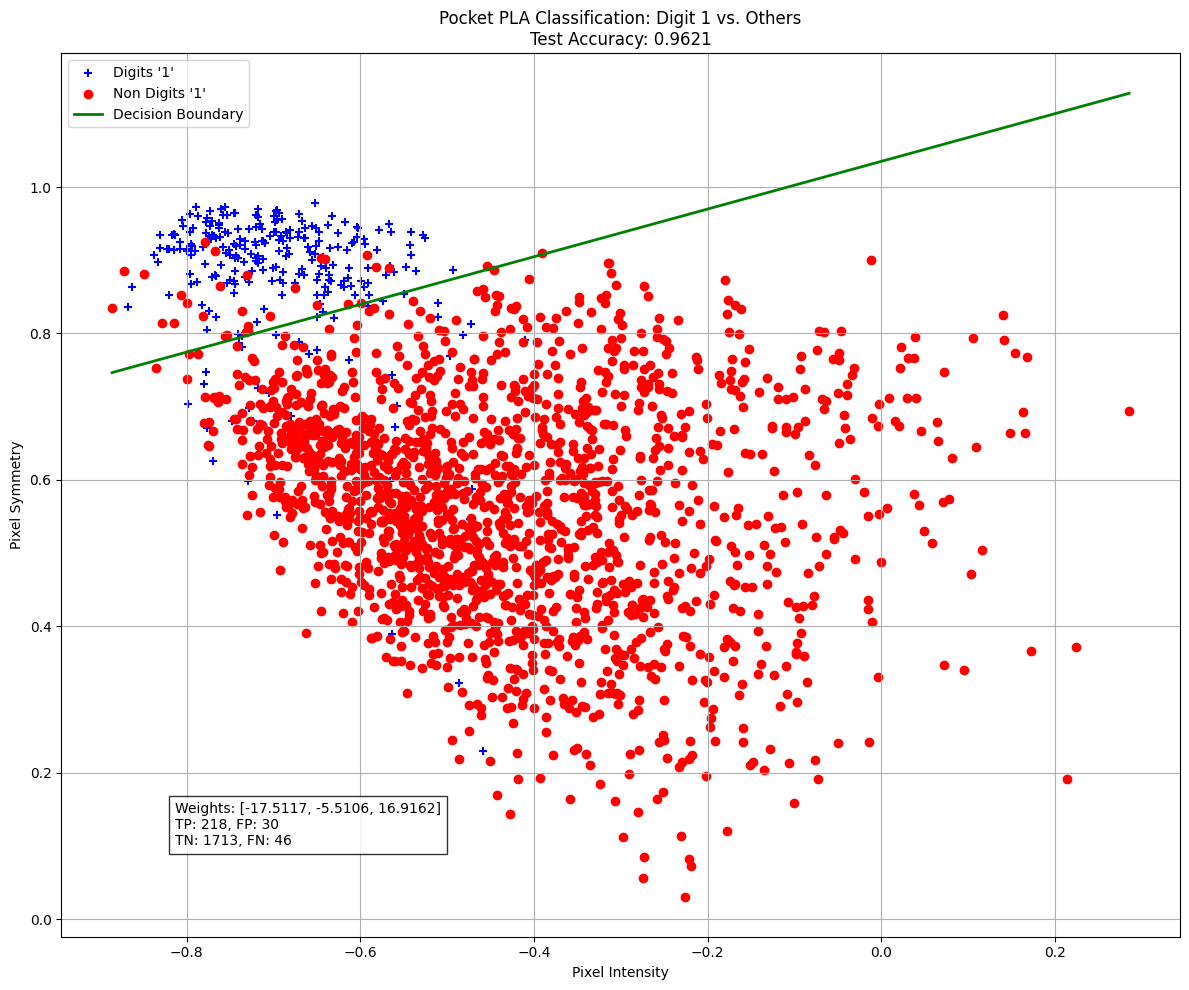

In [98]:
plt.figure(figsize=(12, 10))

plt.scatter(
    X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1],
    color='blue', marker='+', label="Digits '1'"
)

plt.scatter(
    X_test[y_test == -1][:, 0], X_test[y_test == -1][:, 1],
    color='red', marker='o', label="Non Digits '1'"
)

# Decision boundary as w0 + w1X1 + w2X2 = 0 --> X2 = (-w0 - w1X1) / w2
min_intensity = np.min(X_test[:, 0])
max_intensity = np.max(X_test[:, 0])
intensity_range = np.linspace(min_intensity, max_intensity, 100)
decision_boundary = (-best_weights[0] - best_weights[1] * intensity_range) / best_weights[2]

plt.plot(intensity_range, decision_boundary, color='green', linewidth=2, label='Decision Boundary')
plt.title(f"Pocket PLA Classification: Digit 1 vs. Others\nTest Accuracy: {test_accuracy:.4f}")
plt.xlabel('Pixel Intensity')
plt.ylabel('Pixel Symmetry')
plt.legend()
plt.grid(True)

model_info = (
    # f'Iterations: {iterations}\n'
    f'Weights: [{best_weights[0]:.4f}, {best_weights[1]:.4f}, {best_weights[2]:.4f}]\n'
    f'TP: {true_positives}, FP: {false_positives}\n'
    f'TN: {true_negatives}, FN: {false_negatives}'
)
plt.figtext(0.15, 0.15, model_info, bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()


In [99]:
train_mask = np.logical_or(train_labels == 1, train_labels == 7)
test_mask = np.logical_or(test_labels == 1, test_labels == 7)

train_filtered = train_data[train_mask]
test_filtered = test_data[test_mask]

In [100]:
train_filtered[:, 0] = np.where(train_filtered[:, 0] == 7, -1, 1)
test_filtered[:, 0] = np.where(test_filtered[:, 0] == 7, -1, 1)

In [101]:
train_filtered

array([[-1., -1., -1., ..., -1., -1., -1.],
       [ 1., -1., -1., ..., -1., -1., -1.],
       [ 1., -1., -1., ..., -1., -1., -1.],
       ...,
       [ 1., -1., -1., ..., -1., -1., -1.],
       [ 1., -1., -1., ..., -1., -1., -1.],
       [ 1., -1., -1., ..., -1., -1., -1.]])

In [117]:
def calculate_intensity(pixel_data):
    pixels = pixel_data[:, 1:]
    return np.mean(pixels, axis=1)

def calculate_symmetry(pixels):
    """
    Calculate the symmetry of the pixel data.
    """
    pixels = pixels[:, 1:]
    
    # Reshape the pixel data to 16x16
    pixels = pixels.reshape(-1, 16, 16)

    # Calculate absolute difference between left and right halves (flipped)
    left_half = pixels[:, :, :8]
    right_half = pixels[:, :, 8:16]
    right_half_flipped = np.flip(right_half, axis=2)

    # Symmetry calculation with mean absolute error
    symmetry = 1 - np.mean(np.abs(left_half - right_half_flipped), axis=(1, 2))

    return symmetry

In [118]:
train_intensity_a = calculate_intensity(train_filtered)
train_symmetry_a = calculate_symmetry(train_filtered[:, 1:])
filtered_train_labels = train_filtered[:, 0]

test_intensity_a = calculate_intensity(test_filtered)
test_symmetry_a = calculate_symmetry(test_filtered[:, 1:])
filtered_test_labels = test_filtered[:, 0]

ValueError: cannot reshape array of size 420750 into shape (16,16)